In [1]:
from PIL import Image
from PIL import ImageFile
import numpy as np
import random
import dlib
import os

import matplotlib.pyplot as plt

In [2]:
detector = dlib.get_frontal_face_detector()

In [3]:
def get_img_locations(dets):
  img_lst=[]

  for i, d in enumerate(dets):
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(i, d.left(), d.top(), d.right(), d.bottom()))
    dim = (d.left(), d.top(), d.right(), d.bottom())
    img_lst.append(dim)
  
  return img_lst

In [4]:
# Return an image pil object from its dimensions

def construct_image(img_loc, img_arr):

  left, top, right, bottom = img_loc
  face_image = img_arr[top:bottom, left:right]
  pil_img = Image.fromarray(face_image)
  
  return pil_img


*Loop through each image from folder, detects faces, save into another folder*

Processing file: 1.jpg
Number of faces detected: 1
Detection 0: Left: 1959 Top: 726 Right: 2513 Bottom: 1281
[(1959, 726, 2513, 1281)]


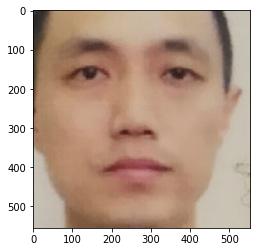

Processing file: 10.jfif
Number of faces detected: 10
Detection 0: Left: 73 Top: 274 Right: 135 Bottom: 336
Detection 1: Left: 727 Top: 372 Right: 770 Bottom: 415
Detection 2: Left: 218 Top: 343 Right: 261 Bottom: 386
Detection 3: Left: 511 Top: 401 Right: 554 Bottom: 444
Detection 4: Left: 803 Top: 285 Right: 855 Bottom: 337
Detection 5: Left: 645 Top: 372 Right: 688 Bottom: 415
Detection 6: Left: 592 Top: 406 Right: 636 Bottom: 449
Detection 7: Left: 415 Top: 367 Right: 458 Bottom: 410
Detection 8: Left: 901 Top: 536 Right: 975 Bottom: 611
Detection 9: Left: 325 Top: 378 Right: 377 Bottom: 429
[(73, 274, 135, 336), (727, 372, 770, 415), (218, 343, 261, 386), (511, 401, 554, 444), (803, 285, 855, 337), (645, 372, 688, 415), (592, 406, 636, 449), (415, 367, 458, 410), (901, 536, 975, 611), (325, 378, 377, 429)]


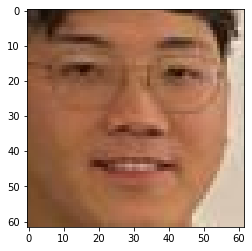

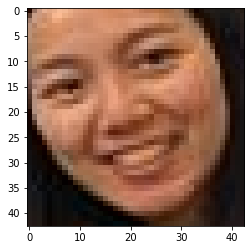

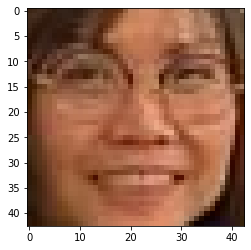

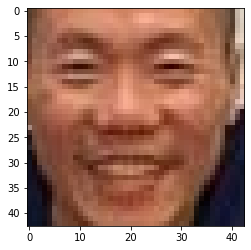

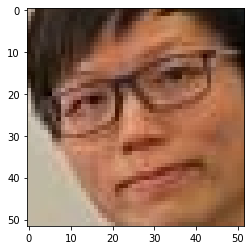

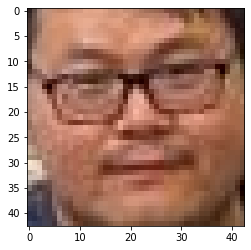

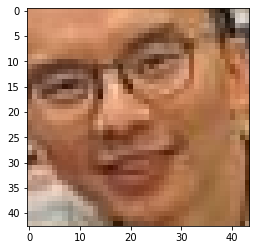

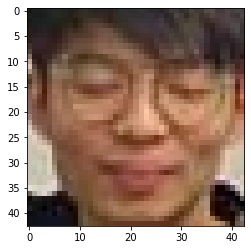

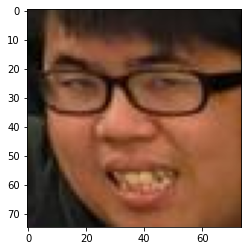

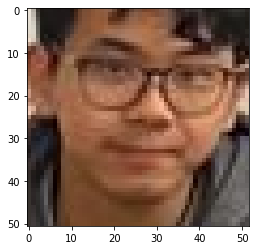

Processing file: 2.jpg
Number of faces detected: 1
Detection 0: Left: 2513 Top: 1281 Right: 3068 Bottom: 1836
[(2513, 1281, 3068, 1836)]


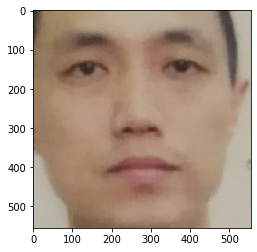

Processing file: 2a.jpg
Number of faces detected: 1
Detection 0: Left: 2513 Top: 1281 Right: 3068 Bottom: 1836
[(2513, 1281, 3068, 1836)]


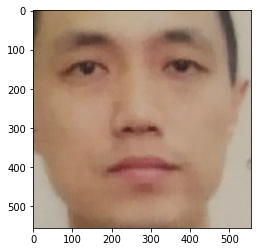

Processing file: 3.jpg
Number of faces detected: 1
Detection 0: Left: 245 Top: 90 Right: 296 Bottom: 141
[(245, 90, 296, 141)]


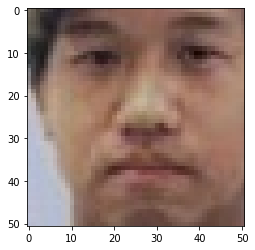

Processing file: 4.jpg
Number of faces detected: 1
Detection 0: Left: 271 Top: 98 Right: 314 Bottom: 142
[(271, 98, 314, 142)]


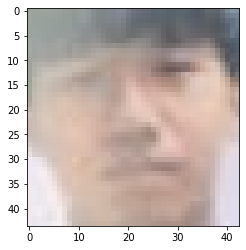

Processing file: 5.jpeg
Number of faces detected: 1
Detection 0: Left: 409 Top: 260 Right: 676 Bottom: 528
[(409, 260, 676, 528)]


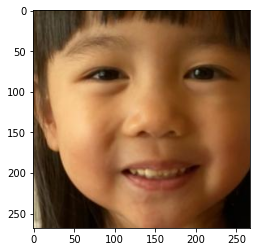

Processing file: 6.jfif
Number of faces detected: 0
[]
Processing file: 7.jfif
Number of faces detected: 0
[]
Processing file: 8.jfif
Number of faces detected: 2
Detection 0: Left: 126 Top: 56 Right: 215 Bottom: 146
Detection 1: Left: 305 Top: 56 Right: 394 Bottom: 146
[(126, 56, 215, 146), (305, 56, 394, 146)]


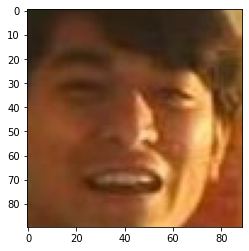

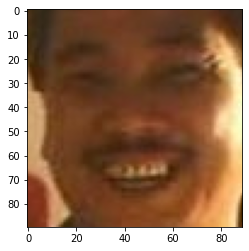

Processing file: 9.jfif
Number of faces detected: 3
Detection 0: Left: 223 Top: 175 Right: 330 Bottom: 283
Detection 1: Left: 677 Top: 235 Right: 784 Bottom: 343
Detection 2: Left: 484 Top: 206 Right: 573 Bottom: 295
[(223, 175, 330, 283), (677, 235, 784, 343), (484, 206, 573, 295)]


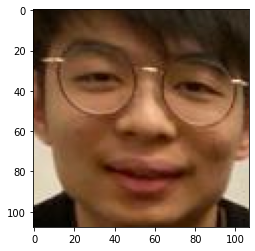

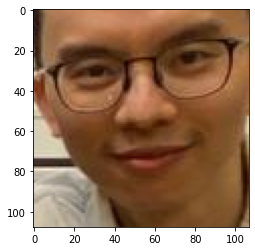

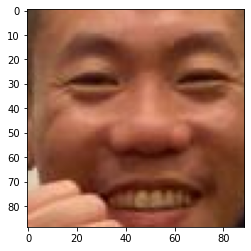

In [5]:
img_path = 'C:/Users/Paddy/Dropbox/5016_project/FaceDetector/img/'

i=0
for file in os.listdir(img_path):
  print("Processing file: {}".format(file))

  #img_arr = dlib.load_rgb_image(img_path + file)
  im = Image.open(img_path + file)
  img_arr = np.asarray(im)
  
  dets = detector(img_arr, 1)
  print("Number of faces detected: {}".format(len(dets)))

  image_locations = get_img_locations(dets)
  print(image_locations)

  j=0
  for img_loc in image_locations:
    pil_img=construct_image(img_loc,img_arr)
    plt.imshow(pil_img)
    plt.show()

    pil_img.save('C:/Users/Paddy/Dropbox/5016_project/FaceDetector/pulled_img/' + 'file'+ str(i) + str(j) + '.jpg')
    j=j+1

  i=i+1